This lab is meant to familiarize ourself with Exploratory Data Analysis techniques on a real-world dataset and to expirement with regulariaztion. The lab opens with loading the data set (a 1990 california housing data set) as a pandas data frame through sklearns' dataset module, then transitions into generating some models for the data set, finishing off with applying some regulariaztion to it.

To start this off, we will use sklearn's datasets module to import California housing data from 1990. The dataset has features and data shown below

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

data = fetch_california_housing(as_frame = True)
data.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


We continue by splitting the data set into a training and test set with a train size of 80% using sklearn's train_test_split() function from the model selection module

In [4]:
from sklearn.model_selection import train_test_split
X,Y = data.data, data.target
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.8, random_state=(2021-3-25))
X_train

NameError: name 'shape' is not defined

Once the data has been gathered, we will generate a linear model comparing the AveBedrooms feature against the House Price value

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()
model.fit(X_train[['AveBedrms']], Y_train)
Y_train_hat = model.predict(X_train[['AveBedrms']])
train_MSE = mean_squared_error(Y_train, Y_train_hat)

Y_test_hat = model.predict(X_test[['AveBedrms']])
test_MSE = mean_squared_error(Y_test, Y_test_hat)
print(train_MSE)
print(test_MSE)

1.3278477256171917
1.3323730132311569


The training and test MSE's seem to be quite high in this case. We can verify this by looking at the $R^2$ values for each MSE. $R^2$ being the *coefficient of determination* which measures the proportion of variability that is explained by the feature.

By looking at the $R^{2}$ values we see that the variability obtained from using Average bedrooms and comparing it to House Value is not explained well. This suggests that Average bedrooms may not be the best feature to study. We can examine which feature to look for by doing some *Exploratory Data Analysis*

In [50]:
R_squared_train = model.score(X_train[['AveBedrms']], Y_train)
R_squared_test = model.score(X_test[['AveBedrms']], Y_test)
print(R_squared_train)
print(R_squared_test)

0.0028776656256584987
-0.0010086368172135263


We can do this by using the scatter matrix provided in the pandas module "plotting" to look at the scatter plots of each feature compared towards others. 

In [43]:
pd.plotting.scatter_matrix(data.frame,figsize=(20,20))

However, doing this for the full dataset can be quite crowded. To fix this we can look at a small sample of that dataset. In this case we can look at 1% of the data.

C:\Users\juanp\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:xlabel='MedInc', ylabel='MedInc'>,
        <AxesSubplot:xlabel='HouseAge', ylabel='MedInc'>,
        <AxesSubplot:xlabel='AveRooms', ylabel='MedInc'>,
        <AxesSubplot:xlabel='AveBedrms', ylabel='MedInc'>,
        <AxesSubplot:xlabel='Population', ylabel='MedInc'>,
        <AxesSubplot:xlabel='AveOccup', ylabel='MedInc'>,
        <AxesSubplot:xlabel='Latitude', ylabel='MedInc'>,
        <AxesSubplot:xlabel='Longitude', ylabel='MedInc'>,
        <AxesSubplot:xlabel='MedHouseVal', ylabel='MedInc'>],
       [<AxesSubplot:xlabel='MedInc', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='HouseAge', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='AveRooms', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='AveBedrms', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='Population', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='AveOccup', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='Latitude', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='Longitude', ylabel='Ho

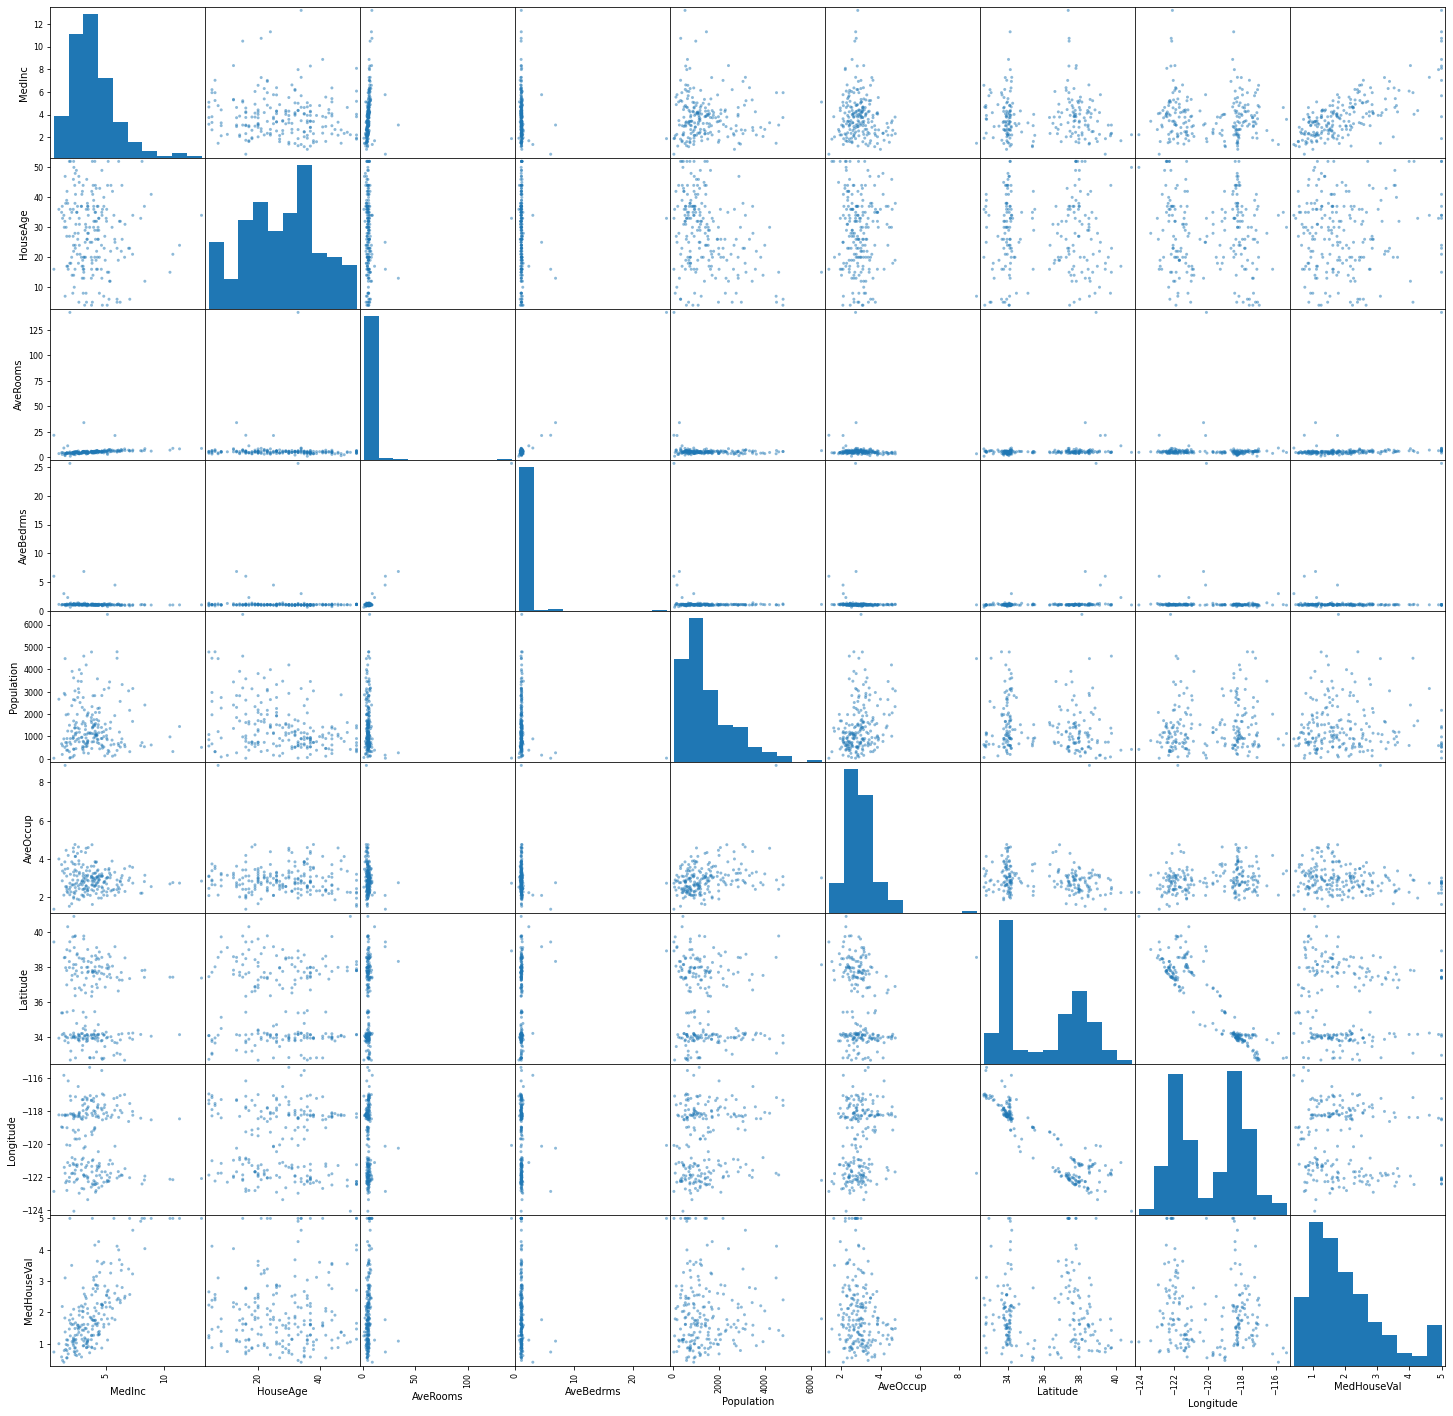

In [44]:
pd.plotting.scatter_matrix(data.frame.sample(frac=0.01),grid = False,figsize = (25,25))

Analyzing the scatterplots we can see that the MedInc feature seems to have the greatest linear relationship from all the over features. 

We can also take a look at where these MedInc households are by cross referencing with the lattitude and logitude through a map. In doing this we can see that the higher along with MedInc you are the more likely you are to be in Los Angeles and in the Bay Area.

We can further determine that MedInc is the best feature by looking at the coorelation matrix. Which will tell us which two features will be strongly coorelated. In doing this we see a very weak value for our previous feature AveBedrms (-0.046701) and a high value with MedInc (0.688075). Which is by far the highest value in relation to MedHouseVal

In [37]:
data.frame.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


Now that we have this information we can take a look at how well a model based around MedInc will compare against a model based around AveBedrms

In [33]:
model.fit(X_train[['MedInc']], Y_train)
Y_train_hat = model.predict(X_train[['MedInc']])
train_MSE = mean_squared_error(Y_train, Y_train_hat)

Y_test_hat = model.predict(X_test[['MedInc']])
test_MSE = mean_squared_error(Y_test, Y_test_hat)
print("Training and testing MSE")
print(train_MSE)
print(test_MSE)

print("\nTraining and testing R-squared")
R_squared_train = model.score(X_train[['MedInc']], Y_train)
R_squared_test = model.score(X_test[['MedInc']], Y_test)
print(R_squared_train)
print(R_squared_test)

Training and testing MSE
0.7083924846855346
0.67220120164671

Training and testing R-squared
0.468045955604915
0.49497685569639605


In doing this we have achieved a higher $R^2$ value than that of the AveBedrms example. We have also managed to get a lower training and test MSE. Showing that this feature is an overall better predictor for MedHouseVal

However, by extending this example to include all features we obtain:

In [34]:
model.fit(X_train, Y_train)
Y_train_hat = model.predict(X_train)
train_MSE = mean_squared_error(Y_train, Y_train_hat)

Y_test_hat = model.predict(X_test)
test_MSE = mean_squared_error(Y_test, Y_test_hat)
print("Training and testing MSE")
print(train_MSE)
print(test_MSE)

R_squared_train = model.score(X_train, Y_train)
R_squared_test = model.score(X_test, Y_test)
print("\nTraining and testing R-squared")
print(R_squared_train)
print(R_squared_test)

Training and testing MSE
0.5296444457890024
0.5047767239631297

Training and testing R-squared
0.6022734414610222
0.6207624626635033


Which is an even better predictor than before. Obtaining not only a smaller training and testing MSE but also a higher $R^2$ value. Showing that including all features is an even better predictor.  

One thing we can do to further reduce our error is to extend this to a polynomial of degree 2 with ever feature.

In [35]:
from sklearn.preprocessing import PolynomialFeatures

polynomial = PolynomialFeatures(2)
X_train_new = polynomial.fit_transform(X_train)
model.fit(X_train_new, Y_train)

Y_train_hat = model.predict(X_train_new)
train_MSE = mean_squared_error(Y_train, Y_train_hat)

X_test_new = polynomial.fit_transform(X_test)
model.fit(X_test_new, Y_test)

Y_test_hat = model.predict(X_test_new)
test_MSE = mean_squared_error(Y_test, Y_test_hat)

print(train_MSE)
print(test_MSE)

0.42433222517444696
0.3740262190933662


Doing this does reduce our training and test MSE. Suggesting that a 2nd degree regression model will produce better predictions. However, we can do some regularization to produce a model that is between linear and quadratic in terms of complexity. This is done by incorperating L2 regularization as:

$$\sum_{i=1}^{M}(y_{i}-\hat{y}_{i})^2 =  \sum_{i=1}^{M}(y_{i}-\sum_{j=0}^{p}(w_{j}\times x_{ij}))^2 + \lambda\sum_{j=0}^{p}w_{j}^{2}$$

Where the last term $\lambda\sum_{j=0}^{p}w_{j}^{2}$, specifically $\lambda$ penalizes higher terms for increasing orders of complexity

In [46]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 1.0, normalize = True)
ridge_reg.fit(X_train_new, Y_train)

Y_train_hat = ridge_reg.predict(X_train_new)
train_MSE = mean_squared_error(Y_train, Y_train_hat)

Y_test_hat = ridge_reg.predict(X_test_new)
test_MSE = mean_squared_error(Y_test, Y_test_hat)

R_squared_train = ridge_reg.score(X_train_new, Y_train)
R_squared_test = ridge_reg.score(X_test_new, Y_test)

print("Training and testing MSE")
print(train_MSE)
print(test_MSE)

print("\nTraining and testing R-squared")
print(R_squared_train)
print(R_squared_test)

Training and testing MSE
0.6457457247916447
0.6190711914117147

Training and testing R-squared
0.5150893644697001
0.5348933044620768


Doing this results in a higher training and testing MSE as well as a lower $R^2$ value. Suggesting that a model that's between linear and polynomial complexity may not be a good fit.